In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("car_Dekho_DA.csv")

# 25 Project Related Questions

**1) From which manufacturing year to which manufacturing year vehicles are present in this data ?**







In [45]:
max_year = df["Year"].max()
min_year = df["Year"].min()
print(f"The Vehicles are present in the data from {min_year} to {max_year}")

The Vehicles are present in the data from 2003 to 2018


**2) What is the lowest price to which a vehicle is sold ?**

In [46]:
lowest_price = df["Selling_Price"].min()
print(f"The lowest price a vehicle sold is {lowest_price} lakhs")

The lowest price a vehicle sold is 0.1 lakhs


**3) What is the highest price to which a vehicle is sold ?**

In [47]:
highest_price = df["Selling_Price"].max()
print(f"The highest price a vehicle sold is {highest_price} lakhs")

The highest price a vehicle sold is 35.0 lakhs


**4) How many records are there in this data ?**

In [48]:
no_of_records = df.shape[0]
print(f"Total number of records in the data are {no_of_records}")

Total number of records in the data are 301


**5) Are there any missing records in this data ?**

In [49]:
missing_records = df.isnull().sum().sum()
print(f"There are {missing_records} missing records in this data.")

There are 0 missing records in this data.


**6) How many different vehicles are present in this data ?**

In [50]:
different_vehicles = df["Car_Name"].nunique()
print(f"The number of different vehicles present in the data are {different_vehicles}")

The number of different vehicles present in the data are 98


**7) Which is the most sold vehicle in this data ?**

In [51]:
most_sold_vehicle = df['Car_Name'].value_counts().idxmax()
print(f"The most sold vehicle in this data is {most_sold_vehicle}.")

The most sold vehicle in this data is city.


**8) Does the database include any CNG vehicle? If yes, how many of them are there?**

In [52]:
cng_vehicles = df[df['Fuel_Type'] == 'CNG'].shape[0]
if(cng_vehicles):
  print("Yes, the database include CNG vehicle.")
print(f"There are {cng_vehicles} CNG vehicles in this data.")

Yes, the database include CNG vehicle.
There are 2 CNG vehicles in this data.


**9) How many vehicles here are for sale from individuals directly?**

In [53]:
individual_sales = df[df['Seller_Type'] == 'Individual'].shape[0]
print(f"There are {individual_sales} vehicles for sale from individuals directly.")

There are 106 vehicles for sale from individuals directly.


**10) Does this database contain auto transmission vehicles? If yes, how many of them are there?**

In [54]:
auto_trans_vehicles = df[df['Transmission'] == 'Automatic'].shape[0]
if(auto_trans_vehicles):
  print("Yes, the database contain auto transmission vehicles.")
print(f"There are {auto_trans_vehicles} auto transmission vehicles in this database.")

Yes, the database contain auto transmission vehicles.
There are 40 auto transmission vehicles in this database.


**11) How many single person owned vehicles are there in this database?**

In [55]:
single_owner_vehicles = df[df['Owner'] == 1].shape[0]
print(f"There are {single_owner_vehicles} single person owned vehicles in this database.")

There are 10 single person owned vehicles in this database.


**12) Which is the most and least cost depreciated vehicle in data?**

In [56]:
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
most_depreciated_vehicle = df.loc[df['Depreciation'].idxmax()]['Car_Name']
least_depreciated_vehicle = df.loc[df['Depreciation'].idxmin()]['Car_Name']
print(f"The most depreciated vehicle is {most_depreciated_vehicle}.")
print(f"The least depreciated vehicle is {least_depreciated_vehicle}.")

The most depreciated vehicle is land cruiser.
The least depreciated vehicle is Honda Activa 4G.


**13) Which brands of vehicles are less affected by cost depreciation?**

In [57]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])
cost_depreciation = df.groupby('Brand')['Depreciation'].mean().sort_values()
least_affected_brands = cost_depreciation.head()
print(f"The brands less affected by cost depreciation are:\n{least_affected_brands}")

The brands less affected by cost depreciation are:
Brand
UM          0.120000
Activa      0.183333
TVS         0.242750
Mahindra    0.250000
Yamaha      0.258750
Name: Depreciation, dtype: float64


**14) Are there any factors which you feel affect the cost depreciation?**

In [58]:
correlation_matrix = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Depreciation']].corr()
print(f"The correlation matrix is:\n{correlation_matrix}")

The correlation matrix is:
                   Year  Selling_Price  Present_Price  Kms_Driven     Owner  \
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104   
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344   
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216   
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000   
Depreciation  -0.333746       0.520881       0.864902    0.333832  0.107415   

               Depreciation  
Year              -0.333746  
Selling_Price      0.520881  
Present_Price      0.864902  
Kms_Driven         0.333832  
Owner              0.107415  
Depreciation       1.000000  


**15) In general, is the selling price affected by the age of the vehicle and distance driven by the vehicle? Is it observable from the data?**

In [59]:
age_correlation = df['Year'].corr(df['Selling_Price'])
distance_correlation = df['Kms_Driven'].corr(df['Selling_Price'])
print(f"The correlation between vehicle age and selling price is {age_correlation}.")
print(f"The correlation between distance driven and selling price is {distance_correlation}.")

The correlation between vehicle age and selling price is 0.23614098016042734.
The correlation between distance driven and selling price is 0.029187090674291236.


**16) Can we get an idea about the newest vehicles (i.e., after 2014 manufactured)?**

In [60]:
new_vehicles = df[df['Year'] > 2014]
print(f"The newest vehicles (after 2014) are:\n{new_vehicles}")

The newest vehicles (after 2014) are:
          Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
2             ciaz  2017           7.25           9.85        6900    Petrol   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
6             ciaz  2015           6.75           8.12       18796    Petrol   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
..             ...   ...            ...            ...         ...       ...   
295           city  2015           8.55          13.09       60076    Diesel   
296           city  2016           9.50          11.60       33988    Diesel   
297           brio  2015           4.00           5.90       60000    Petrol   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    Petrol   

 

**17) Can we find out data of only two-wheelers from this data?**

In [61]:
two_wheeler = df[df["Present_Price"]<3.5]
two_wheeler.reset_index(drop=True,inplace=True)
print(two_wheeler)

                      Car_Name  Year  Selling_Price  Present_Price  \
0                     alto k10  2014           2.50           3.46   
1                          800  2003           0.35           2.28   
2                         omni  2012           1.25           2.69   
3    Royal Enfield Thunder 500  2016           1.75           1.90   
4           UM Renegade Mojave  2017           1.70           1.82   
..                         ...   ...            ...            ...   
99                   Activa 3g  2008           0.17           0.52   
100           Honda CB twister  2010           0.16           0.51   
101         Bajaj Discover 125  2011           0.15           0.57   
102             Honda CB Shine  2007           0.12           0.58   
103           Bajaj Pulsar 150  2006           0.10           0.75   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  Depreciation  \
0         45280    Petrol      Dealer       Manual      0          0.96   
1        

**18) Which is the oldest bike sold here?**

In [62]:
two_wheeler.loc[two_wheeler.Year == two_wheeler.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Brand
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93,800


**19) Which is the newest bike sold here?**

In [63]:
two_wheeler.loc[two_wheeler.Year == two_wheeler.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Brand
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,UM
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,KTM
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,Bajaj
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,Royal
12,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0,0.27,Royal
29,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,0.05,Bajaj
31,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0,0.07,Honda
32,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0,0.06,Yamaha
33,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0,0.12,Honda
35,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,0.20,Bajaj


**20) Which is the most sold bike here?**

In [64]:
most_sold_bike = two_wheeler['Car_Name'].value_counts().idxmax()
print(f"The most sold bike here is {most_sold_bike}.")

The most sold bike here is Royal Enfield Classic 350.


**21) Do you find any deal in two-wheelers which exceeded the general expectation? Can you find a reason for it?**

In [65]:
# Assuming deals exceeding expectations are defined as those with very low depreciation
unexpected_deal = two_wheeler.loc[two_wheeler['Depreciation'].idxmin()]
print(f"The deal in two-wheelers which exceeded the general expectation is:\n{unexpected_deal}")

The deal in two-wheelers which exceeded the general expectation is:
Car_Name         Honda Activa 4G
Year                        2017
Selling_Price               0.48
Present_Price               0.51
Kms_Driven                  4300
Fuel_Type                 Petrol
Seller_Type           Individual
Transmission           Automatic
Owner                          0
Depreciation                0.03
Brand                      Honda
Name: 58, dtype: object


**22) Can we find out data of only cars from this data?**

In [66]:
only_cars = df[df["Present_Price"]>=3.5]
only_cars.reset_index(drop=True,inplace=True)
print(only_cars)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
192     city  2016           9.50          11.60       33988    Diesel   
193     brio  2015           4.00           5.90       60000    Petrol   
194     city  2009           3.35          11.00       87934    Petrol   
195     city  2017          11.50          12.50        9000    Diesel   
196     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  Depreciation  Brand  
0        Dealer       Manual      0          2.24   

**23) Which is the oldest car sold here?**

In [67]:
only_cars.loc[only_cars.Year == only_cars.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Brand
37,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73,sx4


**24) Which is the newest car sold here?**

In [68]:
only_cars.loc[only_cars.Year == only_cars.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation,Brand
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,vitara


**25) Do you find any deal in cars which exceeded the general expectation? Can you find a reason for it?**

In [69]:
# Assuming deals exceeding expectations are defined as those with very low depreciation
unexpected_deal = only_cars.loc[only_cars['Depreciation'].idxmin()]
print(f"The deal in only_cars which exceeded the general expectation is:\n{unexpected_deal}")

The deal in only_cars which exceeded the general expectation is:
Car_Name           ciaz
Year               2016
Selling_Price      8.75
Present_Price      8.89
Kms_Driven        20273
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Depreciation       0.14
Brand              ciaz
Name: 8, dtype: object


# Visualisation of Data

**Horizontal Count plot for data**

<Axes: xlabel='count', ylabel='Car_Name'>

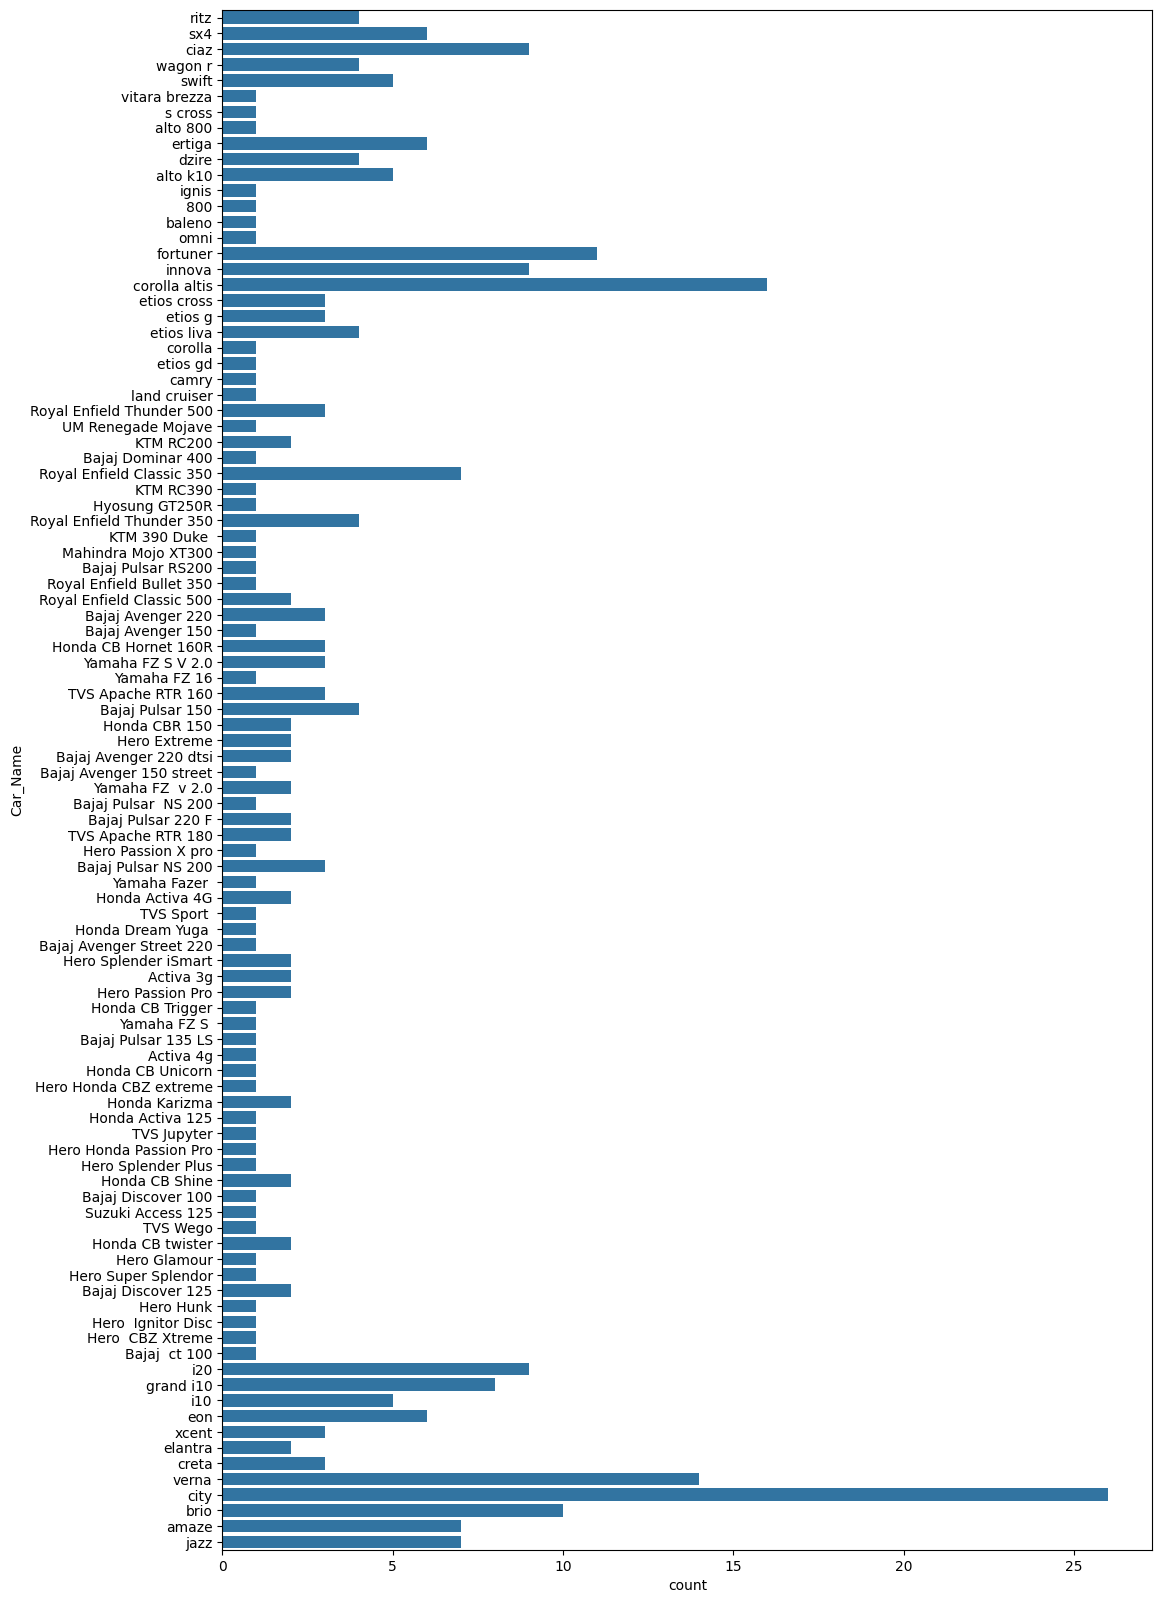

In [81]:
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = df.Car_Name,ax = ax ,data = df)

**Bar Graph for Transmission**

<Axes: xlabel='Transmission'>

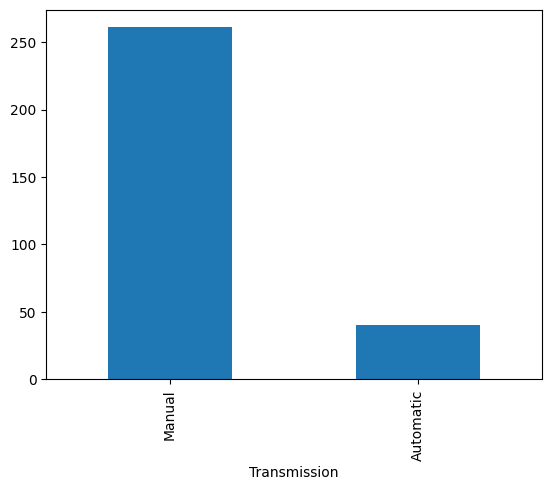

In [82]:
df.Transmission.value_counts().plot.bar()

**Bar Graph for Fuel Type**

<Axes: xlabel='Fuel_Type'>

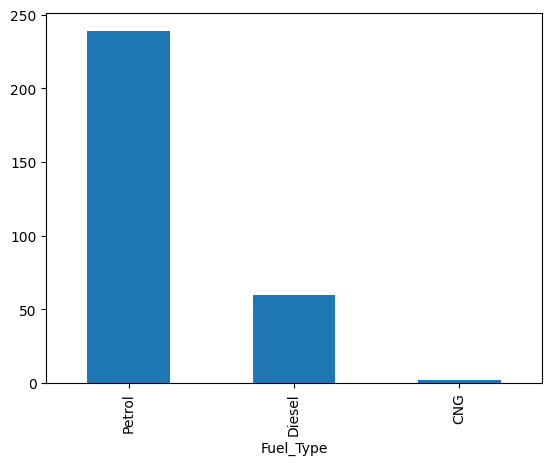

In [83]:
df.Fuel_Type.value_counts().plot.bar()

**Pie Chart for Fuel Type**

<function matplotlib.pyplot.show(close=None, block=None)>

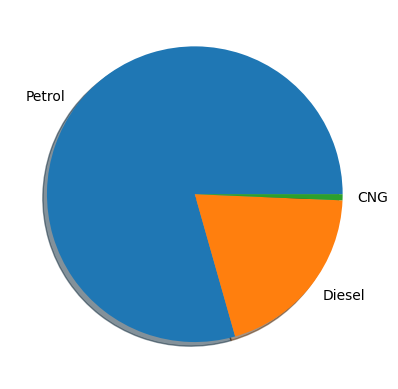

In [85]:
plt.pie(df.Fuel_Type.value_counts(),labels = ["Petrol", "Diesel" , "CNG"],shadow = True)
plt.show

**Pie Chart for Seller Type**

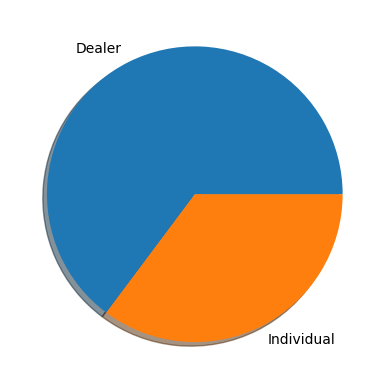

In [86]:
plt.pie(df.Seller_Type.value_counts() , labels = ["Dealer","Individual"] , shadow = True)
plt.show()

**Scatter Plot for Cost depriciation vs Kilometers Driven**

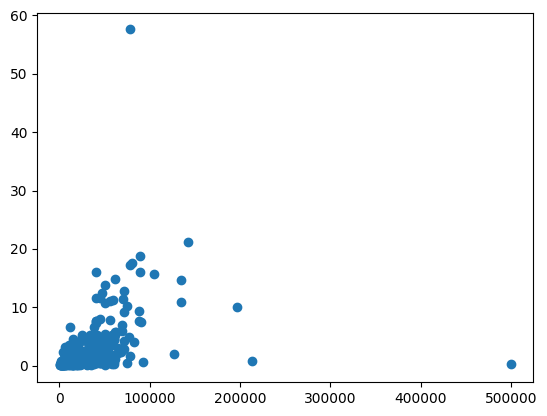

In [88]:
df['depriciation'] = df['Present_Price'] - df['Selling_Price']
plt.scatter(df.Kms_Driven,df.depriciation)
plt.xlabel = "Kilometers Driven"
plt.ylabel = "Cost depriciation in Lakhs"
plt.title = "Cost depriciation vs Kilometers Driven"
plt.show()

**Scatter Plot for Selling price vs Kilometers Driven**

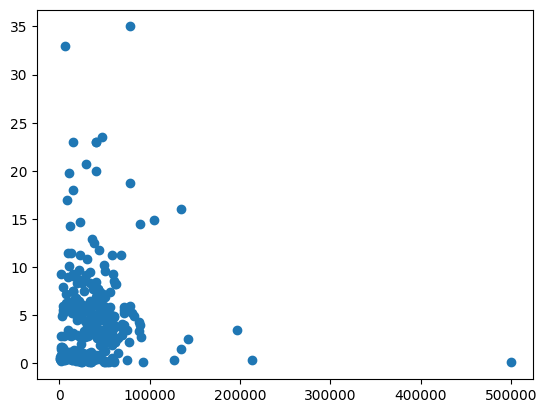

In [89]:
plt.scatter(df.Kms_Driven,df.Selling_Price)
plt.xlabel = "Kilometers Driven"
plt.ylabel = "Selling Price  in Lakhs"
plt.title = "Selling price vs Kilometers Driven"
plt.show()

**Horizontal Countplot of Two wheeler**

<Axes: xlabel='count', ylabel='Car_Name'>

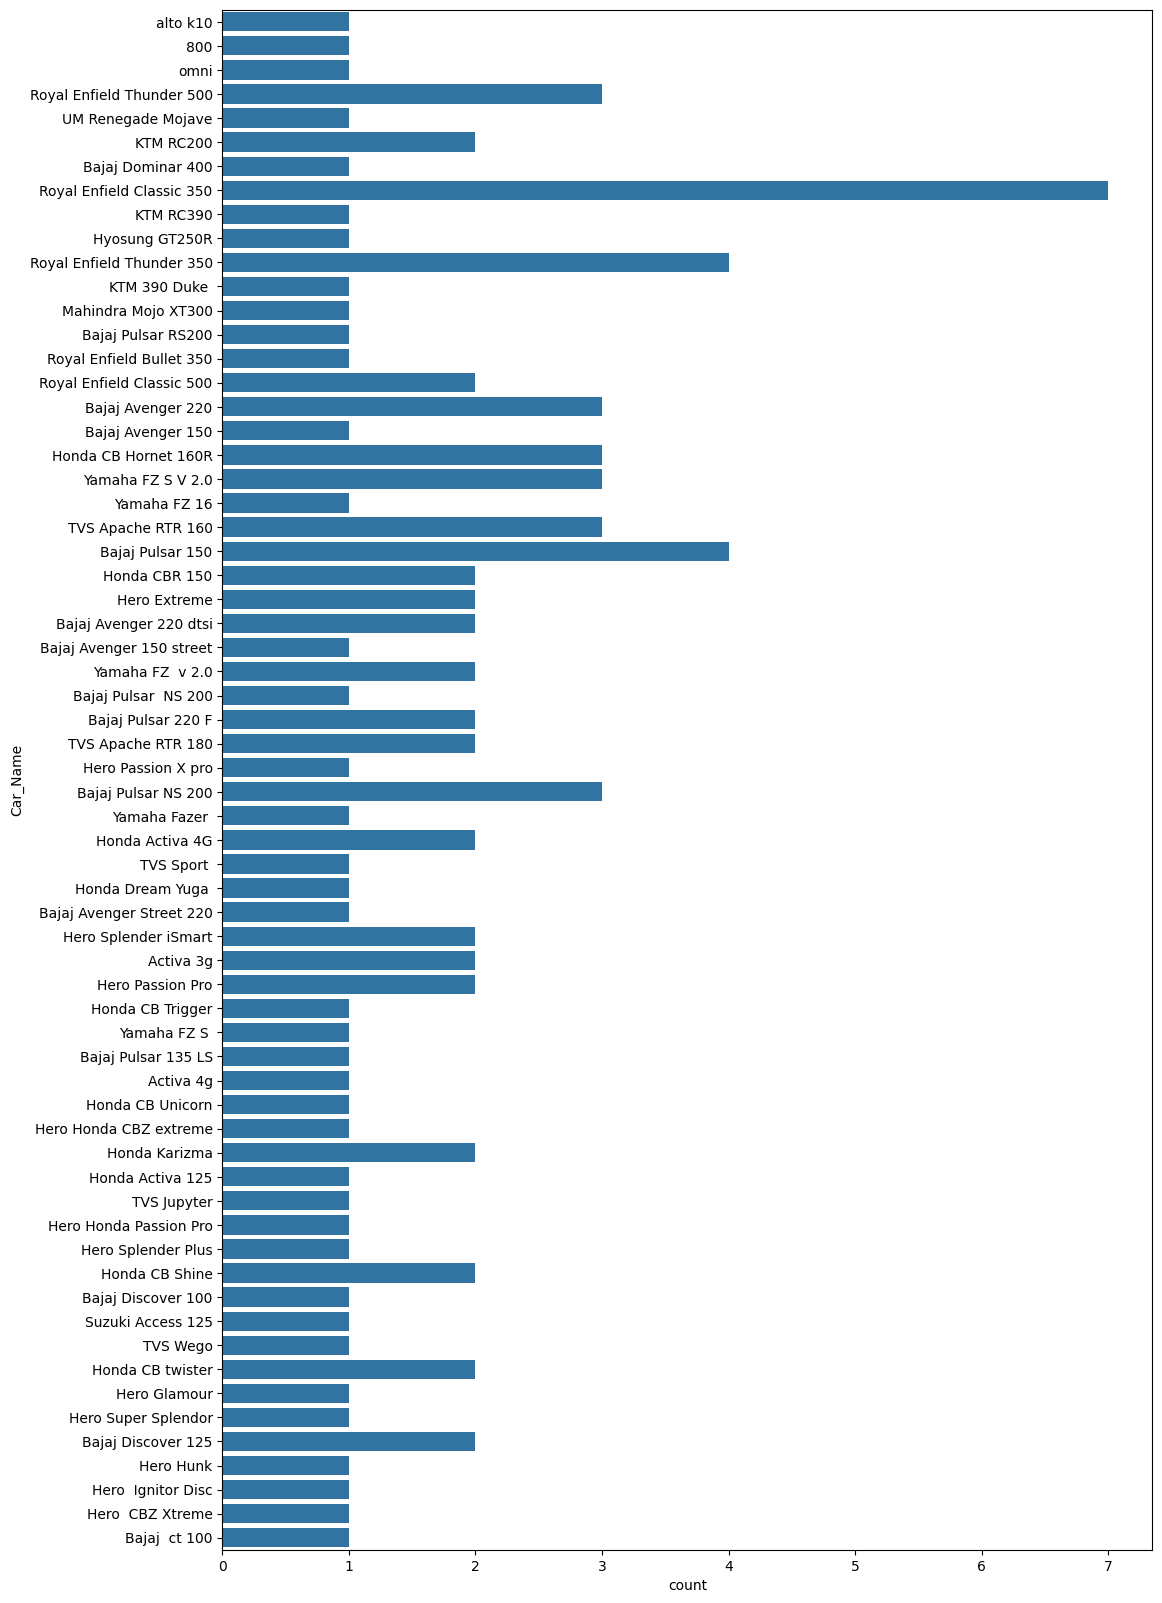

In [90]:
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = two_wheeler.Car_Name,ax = ax ,data = two_wheeler)

**Boxplot of Selling price of Two wheeler**

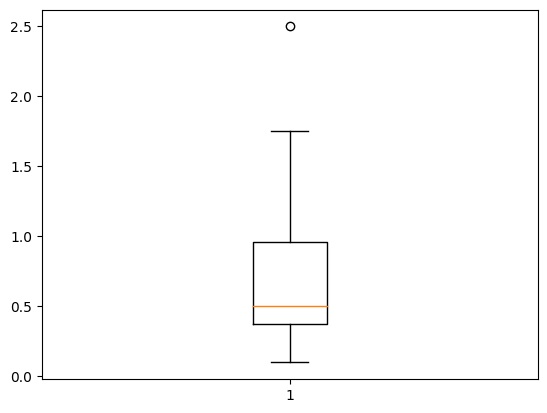

In [91]:
plt.boxplot(two_wheeler.Selling_Price)
plt.show()

**Horizontal Countplot of cars**

<Axes: xlabel='count', ylabel='Car_Name'>

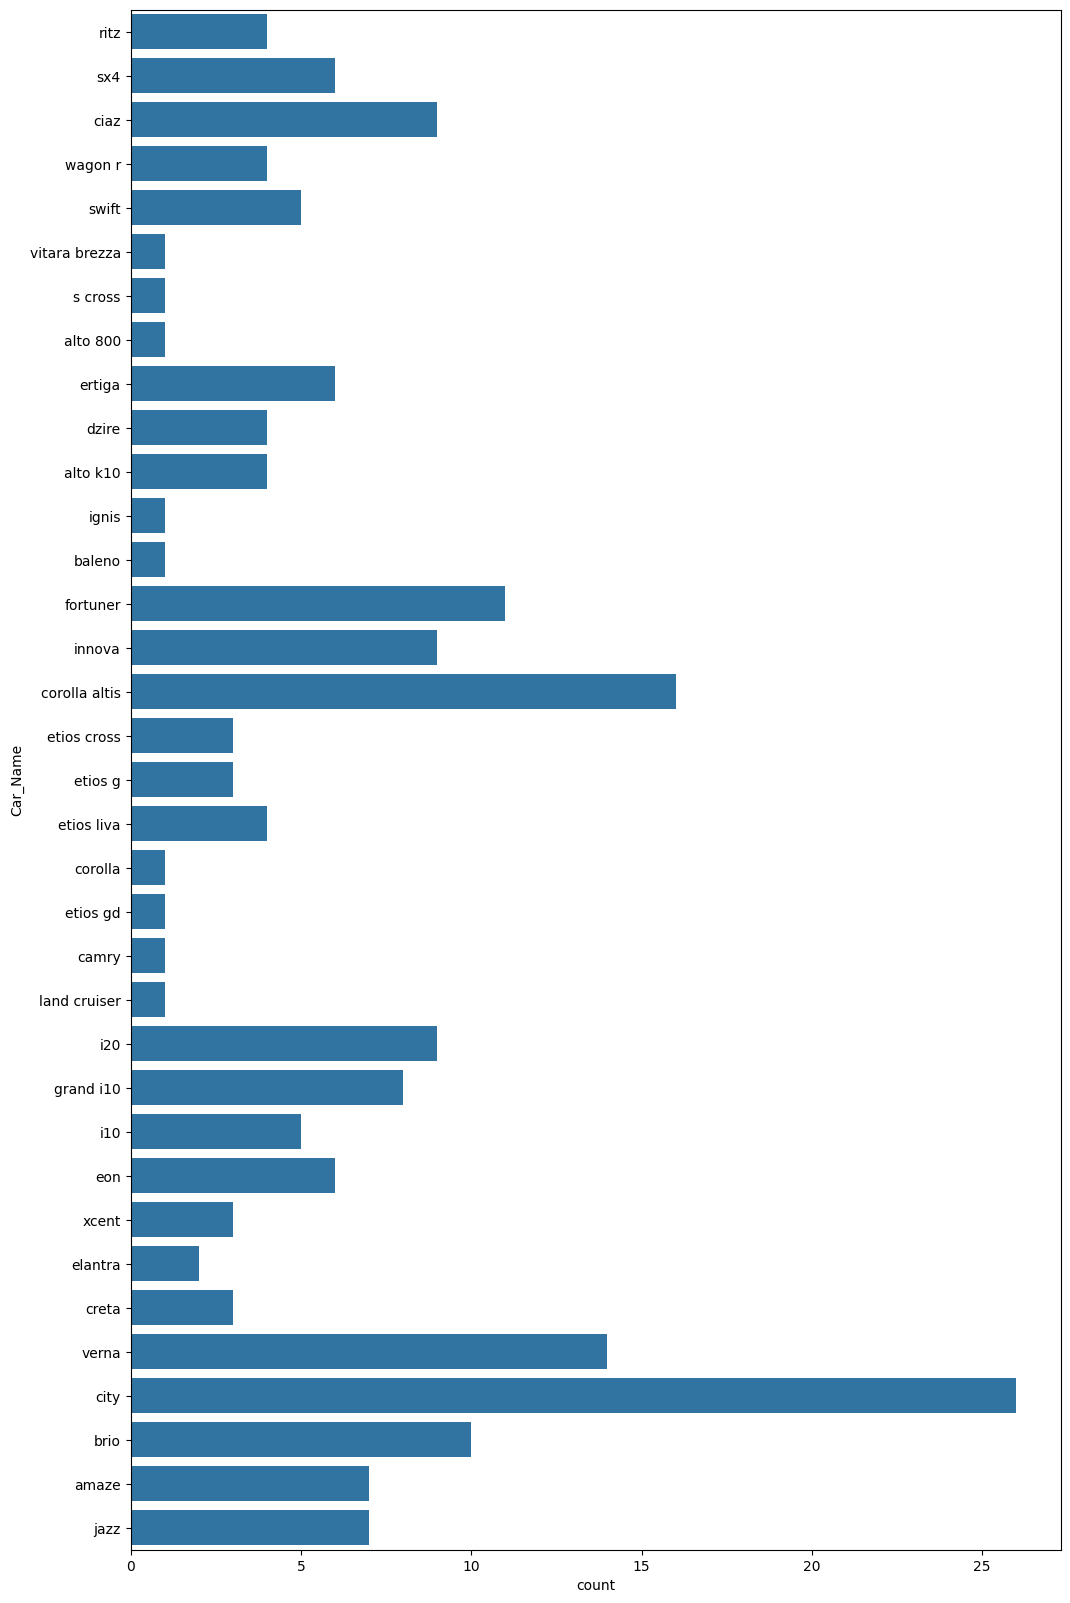

In [92]:
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = only_cars.Car_Name,ax = ax ,data = only_cars)

**Boxplot of Selling Price of Cars**

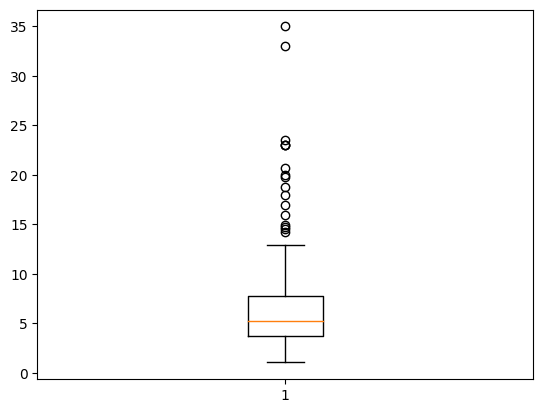

In [93]:
plt.boxplot(only_cars.Selling_Price)
plt.show()

# Some Extra Analysis on car_Dekho_DA dataset

**What is the average selling price of vehicles in this data?**

In [70]:
avg_selling_price = df['Selling_Price'].mean()
print(f"The average selling price of vehicles is {avg_selling_price}.")

The average selling price of vehicles is 4.661295681063123.


**What is the distribution of vehicles by fuel type?**

In [71]:
fuel_type_distribution = df['Fuel_Type'].value_counts()
print(f"The distribution of vehicles by fuel type is:\n{fuel_type_distribution}")

The distribution of vehicles by fuel type is:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


**What is the average number of kilometers driven by the vehicles?**

In [72]:
avg_kms_driven = df['Kms_Driven'].mean()
print(f"The average number of kilometers driven by the vehicles is {avg_kms_driven}.")

The average number of kilometers driven by the vehicles is 36947.20598006644.


**Which fuel type has the highest average selling price?**

In [73]:
highest_avg_selling_price_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean().idxmax()
print(f"The fuel type with the highest average selling price is {highest_avg_selling_price_fuel}.")

The fuel type with the highest average selling price is Diesel.


**What is the most common year of manufacture for the vehicles in this data?**

In [74]:
most_common_year = df['Year'].mode()[0]
print(f"The most common year of manufacture is {most_common_year}.")

The most common year of manufacture is 2015.


**What is the total number of vehicles sold by dealers?**

In [75]:
dealer_sales = df[df['Seller_Type'] == 'Dealer'].shape[0]
print(f"The total number of vehicles sold by dealers is {dealer_sales}.")

The total number of vehicles sold by dealers is 195.


**What is the median selling price of vehicles in this data?**

In [76]:
median_selling_price = df['Selling_Price'].median()
print(f"The median selling price of vehicles is {median_selling_price}.")

The median selling price of vehicles is 3.6.


**Which transmission type has the highest average depreciation?**

In [78]:
highest_avg_depreciation_trans = df.groupby('Transmission')['Depreciation'].mean().idxmax()
print(f"The transmission type with the highest average depreciation is {highest_avg_depreciation_trans}.")

The transmission type with the highest average depreciation is Automatic.


**What is the range of kilometers driven by the vehicles?**

In [79]:
min_kms_driven = df['Kms_Driven'].min()
max_kms_driven = df['Kms_Driven'].max()
print(f"The range of kilometers driven by the vehicles is from {min_kms_driven} to {max_kms_driven}.")

The range of kilometers driven by the vehicles is from 500 to 500000.


**What is the average selling price for each year of manufacture?**

In [80]:
avg_selling_price_by_year = df.groupby('Year')['Selling_Price'].mean()
print(f"The average selling price for each year of manufacture is:\n{avg_selling_price_by_year}")

The average selling price for each year of manufacture is:
Year
2003    1.300000
2004    1.500000
2005    2.487500
2006    1.437500
2007    0.160000
2008    1.002857
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.927049
2016    5.213200
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64
